Analyse the project. Here we are going to analyse the cost of medical insurance based on age, sex, bmi, children, smoker and region.
1)Data Sets
2)Data Analysis
3)Exploratory Data Analysis
4)Data Processing
5)Split data
6)Modeling

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [2]:
#import the data 
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


using age, sex, bmi, childred, smoker, region we are going to predict medical insurance charges

In [3]:
# number of rows and columns 
df.shape

(1338, 7)

In [4]:
# to know the columns name 
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
#to know the data type of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


there are 3 different type of datatype - int, float and object

In [6]:
#lets check the null values if there is any
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

from this we can say there is no null values

In [7]:
#descriptive statistical measures for numerical column of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


from the above describe we can observe all the count values are same so there is no missing value. There are more people who are aged 64 and there is a higher difference between 75% and max. 

now sex column has only 2 values Female or Male so we can convert to 0 or 1

In [8]:
# just to confirm the string values
df['sex'].unique()

array(['female', 'male'], dtype=object)

male      676
female    662
Name: sex, dtype: int64


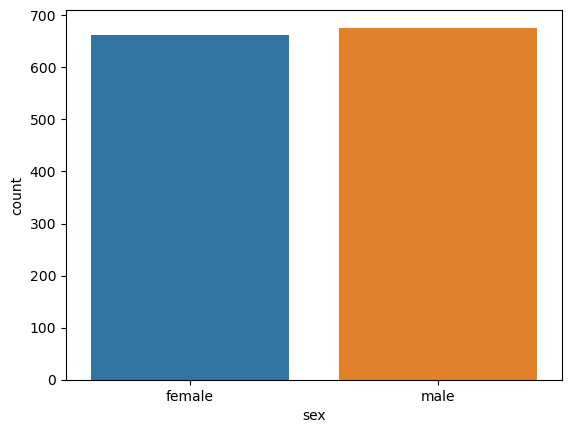

In [9]:
# visualizing the gender 
genders=sns.countplot(x='sex', data=df)
print(df['sex'].value_counts())

So we can there are almost equal number of female and male customer

In [10]:
df['sex']=df['sex'].map({'female':0,'male':1})
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


even smoker column has just 'yes' or 'no' as the value so we can convert them to 0 or 1

In [11]:
# just to confirm the string values
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

no     1064
yes     274
Name: smoker, dtype: int64


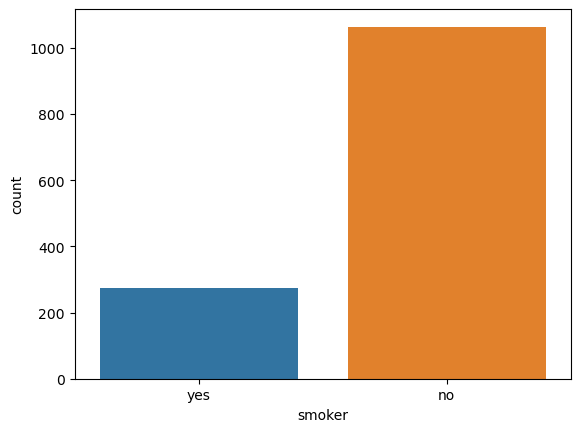

In [12]:
# visualizing the smoker 
smoker=sns.countplot(x='smoker', data=df)
print(df['smoker'].value_counts())

here we can see there are less number of customers who smokes 

In [13]:
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


lets see how many regions are there in the dataset

In [14]:
# just to confirm the string values
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

we can see there are only 4 values so we can assign them as 0,1,2,3 accordingly

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


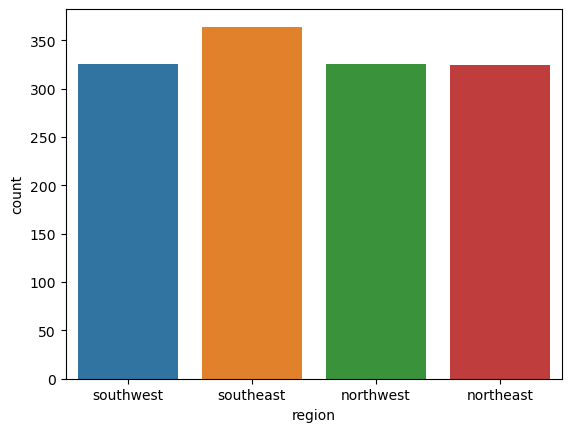

In [15]:
# visualizing the region 
region=sns.countplot(x='region', data=df)
print(df['region'].value_counts())

we can see there are more customers from southeast compared to others. 

In [16]:
df['region']=df['region'].map({'southwest':1,'southeast':2, 'northwest':3,'northeast':4})
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


Text(0, 0.5, 'Count')

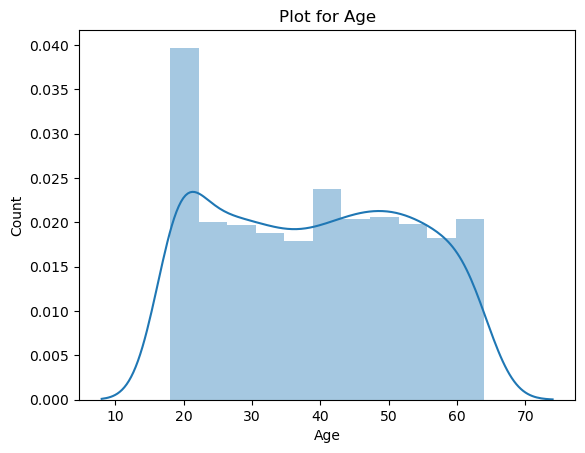

In [17]:
#count plot for age
sns.distplot(df['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

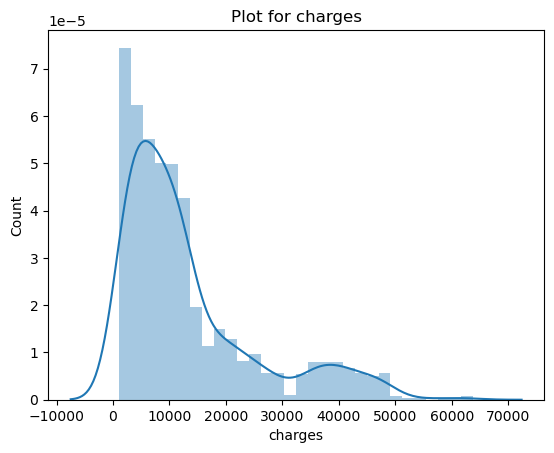

In [18]:
sns.distplot(df['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

Now let us know the co-relation between all the columns(dependent) to the charges(independent variables) column using heatmap

<Axes: >

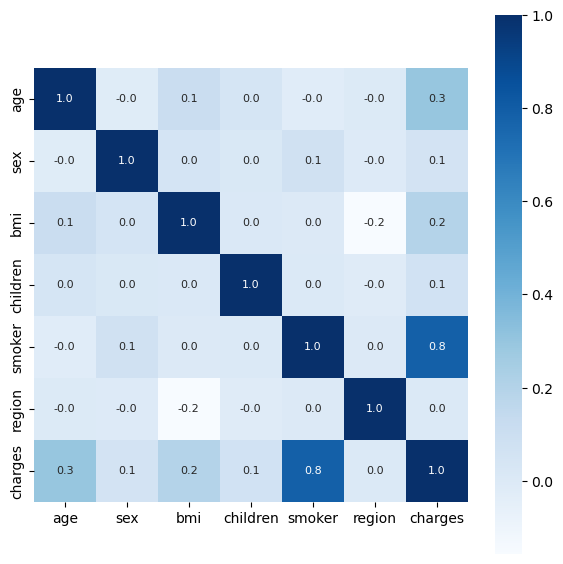

In [19]:
plt.figure(figsize=(7,7))
#sns.heatmap(data,colourbar,squareshape,fmt=onefloatvalue,annot_kws=columnnamesize,cmap=colouryouchoose)
sns.heatmap(df.corr(), cbar=True, square=True, annot=True, fmt='0.1f', cmap="Blues", annot_kws={'size':8})

here we can see which columns are positively corelated(dark blue) and which are negetively corelated(light blue)

so from the heatmap we can say smoker and age are mainly positively corelated with charges. 

smoker is highly coorelated with charges with 80%

now lets seperate dependent and independent columns to X and Y

In [20]:
X=df.drop('charges',axis=1) #axis=1 to drop column. axis=0 to drop row
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


Y will be charges column

In [21]:
Y=df['charges']
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shpae: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (1070, 6)
X_test shape:  (268, 6)
Y_train shpae:  (1070,)
Y_test shape:  (268,)


Model Training

In [23]:
reg=LinearRegression()
reg.fit(X_train,Y_train) 

LinearRegression()

In [24]:
pred = reg.predict(X_test)
print("R2 score: ",(r2_score(Y_test, pred)))

R2 score:  0.7833463107364538


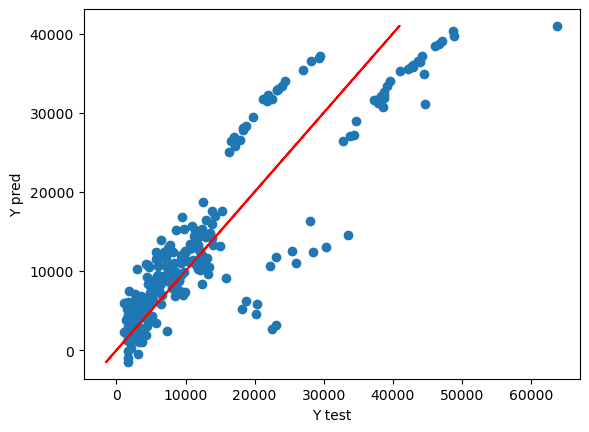

In [25]:
#plot for linear regression
plt.scatter(Y_test, pred)
plt.plot(pred, pred, color='r')
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [26]:
df = {'age':56, 'sex':0, 'bmi':25, 'children':2, 'smoker':1, 'region':3}
index = [0]
cust_df = pd.DataFrame(df, index)
cust_df

,age,sex,bmi,children,smoker,region
0,56,0,25,2,1,3


In [27]:
cost_pred = reg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [35069.79821366]
